<a href="https://colab.research.google.com/github/athiniotim/athiniotim/blob/main/fires_vectorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import seaborn as sns

In [4]:
# !python -m spacy download el_core_news_sm

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12.6/12.6 MB 82.4 MB/s eta 0:00:00
‚úî Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
‚ö† Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [5]:
nlp = spacy.load('el_core_news_sm')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
athensvoice_full_articles_df = pd.read_csv('/content/drive/MyDrive/ŒïŒîŒîŒï.2/fires_csv/fire_athens_voice_articles_df.csv')
athensvoice_full_articles_df

article_url  \
0    https://www.athensvoice.gr/epikairotita/ellada...   
1    https://www.athensvoice.gr/epikairotita/ellada...   
2    https://www.athensvoice.gr/epikairotita/politi...   
3    https://www.athensvoice.gr/epikairotita/diethn...   
4    https://www.athensvoice.gr/epikairotita/diethn...   
..                                                 ...   
744  https://www.athensvoice.gr/epikairotita/diethn...   
745  https://www.athensvoice.gr/epikairotita/diethn...   
746  https://www.athensvoice.gr/epikairotita/ellada...   
747  https://www.athensvoice.gr/epikairotita/ellada...   
748  https://www.athensvoice.gr/epikairotita/ellada...   

                                                 title        date      time  \
0    Œ†œÖœÅŒ∫Œ±Œ≥ŒπŒ¨ œÉŒµ ŒµŒ≥Œ∫Œ±œÑŒ±ŒªŒµŒªŒµŒπŒºŒºŒ≠ŒΩŒø Œ∫œÑŒÆœÅŒπŒø œÉœÑŒø Œ∫Œ≠ŒΩœÑœÅŒø...  2025-05-09  05:16:34   
1    Financial Times: Œ†œåŒªŒ∑ ŒµœÖŒ¨ŒªœâœÑŒ∑ œÉœÑŒπœÇ œÄœÖœÅŒ∫Œ±Œ≥ŒπŒ≠œÇ Œ∑...  2025-05-06  12:59:14   
2    Œ†Œ±ŒΩŒµœÄŒπœÉœÑŒÆŒºŒπŒ±: Œ†ŒøŒπŒΩŒπŒ∫Œ≠œÇ Œ∫Œ±Œπ Œ±œÉœÑŒπŒ∫Œ≠œÇ œÉœÖŒΩŒ≠œÄŒµŒπŒµœÇ Œ≥...  2025-05-03  10:34:00   
3    ŒôŒµœÅŒøœÖœÉŒ±ŒªŒÆŒº: Œ§ŒøœÖŒªŒ¨œáŒπœÉœÑŒøŒΩ 23 œÑœÅŒ±œÖŒºŒ±œÑŒØŒµœÇ Œ±œÄœå œÑŒπœÇ ...  2025-04-30  17:20:00   
4    ŒõŒøŒ≥ŒøŒ∫ŒªŒøœÄŒÆ œÉœÑŒ∑ŒΩ...Œ∫ŒøœÖŒ∂ŒØŒΩŒ±: Influencer œÄŒ±œÅŒøœÖœÉŒØŒ±Œ∂...  2025-04-30  15:33:03   
..                                                 ...         ...       ...   
744  ŒüœÖŒ∫œÅŒ±ŒΩŒØŒ±: Œ†œåœÑŒµ ŒµŒØŒΩŒ±Œπ ŒµŒ≥Œ∫ŒªŒÆŒºŒ±œÑŒ± œÄŒøŒªŒ≠ŒºŒøœÖ ŒøŒπ œÅœâœÉŒπ...  2022-12-17  18:20:59   
745  Œ§œÅŒ±Œ≥œâŒ¥ŒØŒ± œÉœÑŒ∑ŒΩ ŒìŒ±ŒªŒªŒØŒ±: ŒîŒ≠Œ∫Œ± ŒΩŒµŒ∫œÅŒøŒØ, ŒºŒµœÑŒ±Œæœç œÑœâŒΩ ...  2022-12-16  06:45:00   
746  Œ†œÖœÅŒ∫Œ±Œ≥ŒπŒ¨ œÉŒµ Œ¥ŒπŒ±ŒºŒ≠œÅŒπœÉŒºŒ± œÉœÑŒ∑ ŒòŒµœÉœÉŒ±ŒªŒøŒΩŒØŒ∫Œ∑ ‚Äì ŒîœçŒø Œ¨...  2022-12-12  09:12:49   
747  Œ†œÖœÅŒ∫Œ±Œ≥ŒπŒ¨ œÉŒµ ŒµœÅŒ≥ŒøœÉœÑŒ¨œÉŒπŒø œÉœÑŒøŒΩ ŒëœÉœÄœÅœåœÄœÖœÅŒ≥Œø - ŒúŒÆŒΩœÖŒº...  2022-12-09  06:12:00   
748  Œ£œÖŒΩŒ≠œáŒµŒπŒ± œÉœÑŒπœÇ Œ∫Œ±œÑŒ±Œ∏Œ≠œÉŒµŒπœÇ Œ≥ŒπŒ± œÑŒ∑ŒΩ œÄœÖœÅŒ∫Œ±Œ≥ŒπŒ¨ œÉœÑŒø ...  2022-12-01  15:14:00   

                  section    author  \
0                  ŒïŒªŒªŒ±Œ¥Œ±  Newsroom   
1                  ŒïŒªŒªŒ±Œ¥Œ±  Newsroom   
2    Œ†ŒøŒªŒπœÑŒπŒ∫Œ∑ & ŒüŒπŒ∫ŒøŒΩŒøŒºŒπŒ±  Newsroom   
3                  ŒöŒøœÉŒºŒøœÇ  Newsroom   
4                  ŒöŒøœÉŒºŒøœÇ  Newsroom   
..                    ...       ...   
744                ŒöŒøœÉŒºŒøœÇ  Newsroom   
745                ŒöŒøœÉŒºŒøœÇ  Newsroom   
746                ŒïŒªŒªŒ±Œ¥Œ±  Newsroom   
747                ŒïŒªŒªŒ±Œ¥Œ±  Newsroom   
748                ŒïŒªŒªŒ±Œ¥Œ±  Newsroom   

                                               excerpt  \
0    Œ†œÖœÅŒ∫Œ±Œ≥ŒπŒ¨ ŒæŒ≠œÉœÄŒ±œÉŒµ œÑŒø œÄœÅœâŒØ œÑŒ∑œÇ Œ†Œ±œÅŒ±œÉŒ∫ŒµœÖŒÆœÇ œÉŒµ ŒµŒ≥Œ∫...   
1    Œ§Œ∑ŒΩ ŒëŒ∏ŒÆŒΩŒ±, Œ≤Œ¨Œ∂ŒµŒπ œÉœÑŒø Œ∫Œ¨Œ¥œÅŒø œÑœâŒΩ œÄœåŒªŒµœâŒΩ œÄŒøœÖ Œ∏Œ≠œÑŒø...   
2    Œ§Œπ œÉœÖŒ∂Œ∑œÑŒÆŒ∏Œ∑Œ∫Œµ œÉœÑŒ∑ œÉœçœÉŒ∫ŒµœàŒ∑ œÖœÄœå œÑŒøŒΩ œÄœÅœâŒ∏œÖœÄŒøœÖœÅŒ≥œå ...   
3    ŒôœÉœÅŒ±ŒÆŒª: Œ§ŒøœÖŒªŒ¨œáŒπœÉœÑŒøŒΩ 23 œÑœÅŒ±œÖŒºŒ±œÑŒØŒµœÇ Œ±œÄœå œÑŒπœÇ œÄœÖœÅŒ∫...   
4    ŒõŒøŒ≥ŒøŒ∫ŒªŒøœÄŒÆ œÉœÑŒ∑ŒΩ...Œ∫ŒøœÖŒ∂ŒØŒΩŒ±: Influencer œÄŒ±œÅŒøœÖœÉŒØŒ±Œ∂...   
..                                                 ...   
744  Œ†œåŒªŒµŒºŒøœÇ œÉœÑŒ∑ŒΩ ŒüœÖŒ∫œÅŒ±ŒΩŒØŒ±: Œ†œåœÑŒµ ŒøŒπ ŒµœÄŒπŒ∏Œ≠œÉŒµŒπœÇ œÉŒµ ŒºŒ∑...   
745  ŒìŒ±ŒªŒªŒØŒ±: ŒîŒ≠Œ∫Œ± ŒΩŒµŒ∫œÅŒøŒØ, ŒºŒµœÑŒ±Œæœç œÑœâŒΩ ŒøœÄŒøŒØœâŒΩ 5 œÄŒ±ŒπŒ¥Œπ...   
746  ŒòŒµœÉœÉŒ±ŒªŒøŒΩŒØŒ∫Œ∑: Œ¶œâœÑŒπŒ¨ œÉŒµ Œ¥ŒπŒ±ŒºŒ≠œÅŒπœÉŒºŒ± œÉœÑŒ∑ŒΩ ŒßŒ±œÅŒπŒªŒ¨ŒøœÖ...   
747  ŒëœÉœÄœÅœåœÄœÖœÅŒ≥ŒøœÇ: Œ¶œâœÑŒπŒ¨ œÉŒµ ŒµœÅŒ≥ŒøœÉœÑŒ¨œÉŒπŒø œÄŒøŒªœÖŒµœÉœÑŒµœÅŒπŒ∫œéŒΩ...   
748  ŒîŒØŒ∫Œ∑ Œ≥ŒπŒ± œÑŒ∑ŒΩ œÄœÖœÅŒ∫Œ±Œ≥ŒπŒ¨ œÉœÑŒø ŒúŒ¨œÑŒπ - Œ£œÖŒΩŒµœáŒØŒ∂ŒøŒΩœÑŒ±Œπ ...   

                                              subtitle  \
0                   Œ§Œπ Œ±ŒΩŒ±œÜŒ≠œÅŒøœÖŒΩ ŒøŒπ œÄœÅœéœÑŒµœÇ œÄŒªŒ∑œÅŒøœÜŒøœÅŒØŒµœÇ   
1                                                  NaN   
2    ŒöœÖœÅœéœÉŒµŒπœÇ Œ∫Œ±Œπ œÉœÑŒ± ŒôŒ¥œÅœçŒºŒ±œÑŒ± œÄŒøœÖ Œ¥ŒµŒΩ œÉœÖŒºŒºŒøœÅœÜœéŒΩŒøŒΩœÑ...   
3                              ŒúŒ±ŒØŒΩŒøŒΩœÑŒ±Œπ ŒµŒ¥œé Œ∫Œ±Œπ ŒºŒ≠œÅŒµœÇ   
4          Œó œÖœÄœåŒ∏ŒµœÉŒ∑ 

In [13]:
athensvoice_full_articles_df['text_body'][0]

'Œ†œÖœÅŒ∫Œ±Œ≥ŒπŒ¨ ŒæŒ≠œÉœÄŒ±œÉŒµ œÉŒµ Œ∫œÑŒÆœÅŒπŒø œÉœÑŒø Œ∫Œ≠ŒΩœÑœÅŒø œÑŒ∑œÇ ŒëŒ∏ŒÆŒΩŒ±œÇ. Œ£œçŒºœÜœâŒΩŒ± ŒºŒµ œÑŒπœÇ œÄœÅœéœÑŒµœÇ œÄŒªŒ∑œÅŒøœÜŒøœÅŒØŒµœÇ, Œ∑ œÄœÖœÅŒ∫Œ±Œ≥ŒπŒ¨ ŒæŒ≠œÉœÄŒ±œÉŒµ œÑŒ± ŒæŒ∑ŒºŒµœÅœéŒºŒ±œÑŒ± œÑŒ∑œÇ Œ†Œ±œÅŒ±œÉŒ∫ŒµœÖŒÆœÇ, 9 ŒúŒ±ŒêŒøœÖ 2025, œÉŒµ ŒµŒ≥Œ∫Œ±œÑŒ±ŒªŒµŒªŒµŒπŒºŒºŒ≠ŒΩŒø Œ∫œÑŒÆœÅŒπŒø œÉœÑŒ∑ œÉœÖŒºŒ≤ŒøŒªŒÆ œÑœâŒΩ ŒøŒ¥œéŒΩ ŒúŒµŒΩŒµŒºŒ¨œáŒøœÖ Œ∫Œ±Œπ ŒõŒπŒøœÉŒØœâŒΩ, œÉœÑŒø Œ∫Œ≠ŒΩœÑœÅŒø œÑŒ∑œÇ ŒëŒ∏ŒÆŒΩŒ±œÇ. Œ§Œ± Œ±ŒØœÑŒπŒ± œÑŒ∑œÇ œÜœâœÑŒπŒ¨œÇ œÄŒ±œÅŒ±ŒºŒ≠ŒΩŒøœÖŒΩ Œ¨Œ≥ŒΩœâœÉœÑŒ± ŒºŒ≠œáœÅŒπ œÉœÑŒπŒ≥ŒºŒÆœÇ. ŒÜŒºŒµœÉŒ∑ ŒÆœÑŒ±ŒΩ Œ∑ Œ∫ŒπŒΩŒ∑œÑŒøœÄŒøŒØŒ∑œÉŒ∑ œÑŒ∑œÇ Œ†œÖœÅŒøœÉŒ≤ŒµœÉœÑŒπŒ∫ŒÆœÇ Œ•œÄŒ∑œÅŒµœÉŒØŒ±œÇ, ŒºŒµ ŒµŒΩŒΩŒ≠Œ± œÄœÖœÅŒøœÉŒ≤Œ≠œÉœÑŒµœÇ Œ∫Œ±Œπ œÑœÅŒØŒ± ŒøœáŒÆŒºŒ±œÑŒ± ŒΩŒ± ŒµœÄŒπœáŒµŒπœÅŒøœçŒΩ œÉœÑŒø œÉŒ∑ŒºŒµŒØŒø. Œó œÄœÖœÅŒ∫Œ±Œ≥ŒπŒ¨ Œ∫Œ±œÑŒ±œÉŒ≤Œ≠œÉœÑŒ∑Œ∫Œµ œáœâœÅŒØœÇ ŒΩŒ± Œ±ŒΩŒ±œÜŒµœÅŒ∏ŒøœçŒΩ œÑœÅŒ±œÖŒºŒ±œÑŒπœÉŒºŒøŒØ ŒÆ œÉŒ∑ŒºŒ±ŒΩœÑŒπŒ∫Œ≠œÇ Œ∂Œ∑ŒºŒπŒ≠œÇ œÉŒµ œÄŒ±œÅŒ±Œ∫ŒµŒØŒºŒµŒΩŒ± Œ∫œÑŒÆœÅŒπŒ±.'

Œ∏Œ± œáœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒÆœÉŒøœÖŒºŒµ œÑŒ± œÄŒ±œÅŒ±œÄŒ¨ŒΩœâ Œ¨œÅŒ∏œÅŒ± œÄŒøœÖ ŒºŒ±Œ∂Œ≠œàŒ±ŒºŒµ Œ±œÄœå œÑŒ∑ŒΩ efsyn

In [8]:
athensvoice_full_articles_df.head(1)

article_url  \
0  https://www.athensvoice.gr/epikairotita/ellada...   

                                               title        date      time  \
0  Œ†œÖœÅŒ∫Œ±Œ≥ŒπŒ¨ œÉŒµ ŒµŒ≥Œ∫Œ±œÑŒ±ŒªŒµŒªŒµŒπŒºŒºŒ≠ŒΩŒø Œ∫œÑŒÆœÅŒπŒø œÉœÑŒø Œ∫Œ≠ŒΩœÑœÅŒø...  2025-05-09  05:16:34   

  section    author                                            excerpt  \
0  ŒïŒªŒªŒ±Œ¥Œ±  Newsroom  Œ†œÖœÅŒ∫Œ±Œ≥ŒπŒ¨ ŒæŒ≠œÉœÄŒ±œÉŒµ œÑŒø œÄœÅœâŒØ œÑŒ∑œÇ Œ†Œ±œÅŒ±œÉŒ∫ŒµœÖŒÆœÇ œÉŒµ ŒµŒ≥Œ∫...   

                             subtitle  \
0  Œ§Œπ Œ±ŒΩŒ±œÜŒ≠œÅŒøœÖŒΩ ŒøŒπ œÄœÅœéœÑŒµœÇ œÄŒªŒ∑œÅŒøœÜŒøœÅŒØŒµœÇ   

                                           text_body  \
0  Œ†œÖœÅŒ∫Œ±Œ≥ŒπŒ¨ ŒæŒ≠œÉœÄŒ±œÉŒµ œÉŒµ Œ∫œÑŒÆœÅŒπŒø œÉœÑŒø Œ∫Œ≠ŒΩœÑœÅŒø œÑŒ∑œÇ ŒëŒ∏ŒÆŒΩ...   

                                       feat_img_link  
0  https://www.athensvoice.gr/images/1074x600/jpg...

In [9]:
athensvoice_full_articles_df.dtypes

article_url      object
title            object
date             object
time             object
section          object
author           object
excerpt          object
subtitle         object
text_body        object
feat_img_link    object
dtype: object

In [10]:
athensvoice_full_articles_df.loc[0, 'date']

'2025-05-09'

In [11]:
athensvoice_full_articles_df['date_dt'] = pd.to_datetime(athensvoice_full_articles_df['date'], format='%Y-%m-%d')

In [17]:
athensvoice_full_articles_df['time_dt'] = pd.to_datetime(athensvoice_full_articles_df['time'], format='%H:%M:%S')

In [20]:
athensvoice_full_articles_df['datetime'] = pd.to_datetime(
    athensvoice_full_articles_df['date'] + ' ' + athensvoice_full_articles_df['time'],
    format='%Y-%m-%d %H:%M:%S')

In [21]:
athensvoice_full_articles_df.dtypes

article_url              object
title                    object
date                     object
time                     object
section                  object
author                   object
excerpt                  object
subtitle                 object
text_body                object
feat_img_link            object
date_dt          datetime64[ns]
full_text                object
time_dt          datetime64[ns]
datetime         datetime64[ns]
dtype: object

In [26]:
athensvoice_full_articles_df['full_text'] = (
    athensvoice_full_articles_df['title'].fillna('') + ' .' +
    athensvoice_full_articles_df['subtitle'].fillna('') + ' .' +
    athensvoice_full_articles_df['excerpt'].fillna('') + ' .' +
    athensvoice_full_articles_df['text_body'].fillna('.')
).str.strip()

In [27]:
short_athensvoice_df = athensvoice_full_articles_df[['datetime','full_text']]
short_athensvoice_df = short_athensvoice_df.reset_index(drop=True)
short_athensvoice_df.head(1)

datetime                                          full_text
0 2025-05-09 05:16:34  Œ†œÖœÅŒ∫Œ±Œ≥ŒπŒ¨ œÉŒµ ŒµŒ≥Œ∫Œ±œÑŒ±ŒªŒµŒªŒµŒπŒºŒºŒ≠ŒΩŒø Œ∫œÑŒÆœÅŒπŒø œÉœÑŒø Œ∫Œ≠ŒΩœÑœÅŒø...

In [28]:
short_athensvoice_df['year'] = pd.DatetimeIndex(short_athensvoice_df['datetime']).year
short_athensvoice_df['month'] = pd.DatetimeIndex(short_athensvoice_df['datetime']).month
short_athensvoice_df['day'] = pd.DatetimeIndex(short_athensvoice_df['datetime']).day
short_athensvoice_df['hour'] = pd.DatetimeIndex(short_athensvoice_df['datetime']).hour

In [29]:
short_athensvoice_df.head()

datetime                                          full_text  \
0 2025-05-09 05:16:34  Œ†œÖœÅŒ∫Œ±Œ≥ŒπŒ¨ œÉŒµ ŒµŒ≥Œ∫Œ±œÑŒ±ŒªŒµŒªŒµŒπŒºŒºŒ≠ŒΩŒø Œ∫œÑŒÆœÅŒπŒø œÉœÑŒø Œ∫Œ≠ŒΩœÑœÅŒø...   
1 2025-05-06 12:59:14  Financial Times: Œ†œåŒªŒ∑ ŒµœÖŒ¨ŒªœâœÑŒ∑ œÉœÑŒπœÇ œÄœÖœÅŒ∫Œ±Œ≥ŒπŒ≠œÇ Œ∑...   
2 2025-05-03 10:34:00  Œ†Œ±ŒΩŒµœÄŒπœÉœÑŒÆŒºŒπŒ±: Œ†ŒøŒπŒΩŒπŒ∫Œ≠œÇ Œ∫Œ±Œπ Œ±œÉœÑŒπŒ∫Œ≠œÇ œÉœÖŒΩŒ≠œÄŒµŒπŒµœÇ Œ≥...   
3 2025-04-30 17:20:00  ŒôŒµœÅŒøœÖœÉŒ±ŒªŒÆŒº: Œ§ŒøœÖŒªŒ¨œáŒπœÉœÑŒøŒΩ 23 œÑœÅŒ±œÖŒºŒ±œÑŒØŒµœÇ Œ±œÄœå œÑŒπœÇ ...   
4 2025-04-30 15:33:03  ŒõŒøŒ≥ŒøŒ∫ŒªŒøœÄŒÆ œÉœÑŒ∑ŒΩ...Œ∫ŒøœÖŒ∂ŒØŒΩŒ±: Influencer œÄŒ±œÅŒøœÖœÉŒØŒ±Œ∂...   

     year  month   day  hour  
0  2025.0    5.0   9.0   5.0  
1  2025.0    5.0   6.0  12.0  
2  2025.0    5.0   3.0  10.0  
3  2025.0    4.0  30.0  17.0  
4  2025.0    4.0  30.0  15.0

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Œ¥ŒπŒ±ŒΩœÖœÉŒºŒ±œÑŒøœÄŒøŒØŒ∑œÉŒ∑ = ŒºŒµœÑŒ±œÑœÅŒøœÄŒÆ Œ∫ŒµŒπŒºŒ≠ŒΩœâŒΩ œÉŒµ ŒºŒπŒ± œÉŒµŒπœÅŒ¨ Œ±œÄœå Œ±œÅŒπŒ∏ŒºŒøœçœÇ

In [31]:
cv = CountVectorizer()  #œÄŒ¨ŒΩœÑŒ± Œ±œÖœÑœå

In [75]:
short_athensvoice_df.head(5)

datetime                                          full_text  \
0 2025-05-09 05:16:34  Œ†œÖœÅŒ∫Œ±Œ≥ŒπŒ¨ œÉŒµ ŒµŒ≥Œ∫Œ±œÑŒ±ŒªŒµŒªŒµŒπŒºŒºŒ≠ŒΩŒø Œ∫œÑŒÆœÅŒπŒø œÉœÑŒø Œ∫Œ≠ŒΩœÑœÅŒø...   
1 2025-05-06 12:59:14  Financial Times: Œ†œåŒªŒ∑ ŒµœÖŒ¨ŒªœâœÑŒ∑ œÉœÑŒπœÇ œÄœÖœÅŒ∫Œ±Œ≥ŒπŒ≠œÇ Œ∑...   
2 2025-05-03 10:34:00  Œ†Œ±ŒΩŒµœÄŒπœÉœÑŒÆŒºŒπŒ±: Œ†ŒøŒπŒΩŒπŒ∫Œ≠œÇ Œ∫Œ±Œπ Œ±œÉœÑŒπŒ∫Œ≠œÇ œÉœÖŒΩŒ≠œÄŒµŒπŒµœÇ Œ≥...   
3 2025-04-30 17:20:00  ŒôŒµœÅŒøœÖœÉŒ±ŒªŒÆŒº: Œ§ŒøœÖŒªŒ¨œáŒπœÉœÑŒøŒΩ 23 œÑœÅŒ±œÖŒºŒ±œÑŒØŒµœÇ Œ±œÄœå œÑŒπœÇ ...   
4 2025-04-30 15:33:03  ŒõŒøŒ≥ŒøŒ∫ŒªŒøœÄŒÆ œÉœÑŒ∑ŒΩ...Œ∫ŒøœÖŒ∂ŒØŒΩŒ±: Influencer œÄŒ±œÅŒøœÖœÉŒØŒ±Œ∂...   

     year  month   day  hour  
0  2025.0    5.0   9.0   5.0  
1  2025.0    5.0   6.0  12.0  
2  2025.0    5.0   3.0  10.0  
3  2025.0    4.0  30.0  17.0  
4  2025.0    4.0  30.0  15.0

In [76]:
short_athensvoice_df.shape

(749, 6)

In [101]:
count_vector = cv.fit_transform(short_athensvoice_df['full_text'])  #œÄŒ¨œÅŒµ Œ±œÖœÑŒ¨ œÑŒ± Œ∫ŒµŒØŒºŒµŒΩŒ± Œ±œÄœå Œ±œÖœÑŒÆ œÑŒ∑ œÉœÑŒÆŒªŒ∑ Œ∫Œ±Œπ Œ¥ŒπŒ±ŒΩœÖœÉŒºŒ±œÑŒøœÄŒøŒØŒ∑œÉŒ≠ œÑŒ±

In [102]:
count_vector

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3942 stored elements and shape (749, 20)>

In [103]:
count_vector.shape

(749, 20)

In [104]:
BoW = cv.get_feature_names_out()  #Œ¥ŒØŒΩŒµŒπ œÑŒπœÇ ŒºŒøŒΩŒ±Œ¥ŒπŒ∫Œ≠œÇ ŒªŒ≠ŒæŒµŒπœÇ
list(BoW)[22000:22010]

[]

In [105]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

civilprotection gov  gov gr  pic twitter  twitter com  Œ≥ŒµŒΩŒπŒ∫ŒÆ Œ≥œÅŒ±ŒºŒºŒ±œÑŒµŒØŒ±  \
0                    0       0            0            0                  0   
1                    0       0            0            0                  0   
2                    0       0            0            0                  0   
3                    0       0            0            0                  0   
4                    0       0            0            0                  0   

   Œ≥ŒµŒΩŒπŒ∫ŒÆœÇ Œ≥œÅŒ±ŒºŒºŒ±œÑŒµŒØŒ±œÇ  Œ≥œÅŒ±ŒºŒºŒ±œÑŒµŒØŒ± œÄŒøŒªŒπœÑŒπŒ∫ŒÆœÇ  Œ≥œÅŒ±ŒºŒºŒ±œÑŒµŒØŒ±œÇ œÄŒøŒªŒπœÑŒπŒ∫ŒÆœÇ  \
0                    0                     0                      0   
1                    0                     0                      0   
2                    0                     0                      0   
3                    0                     0                      0   
4                    0                     0                      0   

   Œ¥Œ±œÉŒπŒ∫œéŒΩ œÄœÖœÅŒ∫Œ±Œ≥ŒπœéŒΩ  Œ∫ŒØŒΩŒ¥œÖŒΩŒøœÇ œÄœÖœÅŒ∫Œ±Œ≥ŒπŒ¨œÇ  Œ∫Œ±œÑŒ∑Œ≥ŒøœÅŒØŒ± Œ∫ŒπŒΩŒ¥œçŒΩŒøœÖ  \
0                  0                   0                   0   
1                  1                   2                   0   
2                  0                   0                   0   
3                  0                   0                   0   
4                  0                   0                   0   

   Œ∫ŒπŒΩŒ¥œçŒΩŒøœÖ œÄœÖœÅŒ∫Œ±Œ≥ŒπŒ¨œÇ  Œ∫ŒªŒπŒºŒ±œÑŒπŒ∫ŒÆœÇ Œ∫œÅŒØœÉŒ∑œÇ  Œ∫œÅŒØœÉŒ∑œÇ œÄŒøŒªŒπœÑŒπŒ∫ŒÆœÇ  \
0                   0                  0                 0   
1                   0                  0                 0   
2                   0                  0                 0   
3                   0                  0                 0   
4                   0                  0                 0   

   œÄŒøŒªŒπœÑŒπŒ∫ŒÆœÇ œÄœÅŒøœÉœÑŒ±œÉŒØŒ±œÇ  œÄœÅŒøœÉœÑŒ±œÉŒØŒ±œÇ civilprotection  œÄœÅœåŒ≤ŒªŒµœàŒ∑œÇ Œ∫ŒπŒΩŒ¥œçŒΩŒøœÖ  \
0                     0                           0                   0   
1                     0                           0                   0   
2                     0                           0                   0   
3                     0                           0                   0   
4                     0                           0                   0   

   œÄœÖœÅŒøœÉŒ≤ŒµœÉœÑŒπŒ∫ŒÆ œÖœÄŒ∑œÅŒµœÉŒØŒ±  œÖœÄŒøœÖœÅŒ≥ŒµŒØŒøœÖ Œ∫ŒªŒπŒºŒ±œÑŒπŒ∫ŒÆœÇ  œÖœàŒ∑ŒªœåœÇ Œ∫ŒØŒΩŒ¥œÖŒΩŒøœÇ  
0                      0                      0                0  
1                      0                      0                0  
2                      0                      0                0  
3                      0                      0                0  
4                      0                      0                0

In [106]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words))

In [107]:
count_vector = cv.fit_transform(short_athensvoice_df['full_text'])

In [108]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

00  000  0000  00002  000euro  002  007  00h2slmvkq‚Ñπ  01  02  ...  ÿ£ŸÖŸÜ  \
0   0    0     0      0        0    0    0            0   0   0  ...    0   
1   0    2     0      0        0    0    0            0   0   0  ...    0   
2   0    0     0      0        0    0    0            0   0   0  ...    0   
3   0    0     0      0        0    0    0            0   0   0  ...    0   
4   0    0     0      0        0    0    0            0   0   0  ...    0   

   ÿßŸÑÿ•ÿ≥ŸÖÿßÿπŸäŸÑŸäÿ©  ÿ™ÿÆŸÅŸä  ŸÑŸÑŸÜŸäÿ±ÿßŸÜ  ŸÖÿ®ŸÜŸâ  ŸÖÿØŸäÿ±Ÿäÿ©  ŸÖÿ±ÿπÿ®ÿ©  ŸÖÿ¥ÿßŸáÿØ  ŸÖŸÑÿßŸÖÿ≠  ‚Å∞multiple  
0            0     0        0     0       0      0      0      0          0  
1            0     0        0     0       0      0      0      0          0  
2            0     0        0     0       0      0      0      0          0  
3            0     0        0     0       0      0      0      0          0  
4            0     0        0     0       0      0      0      0          0  

[5 rows x 29194 columns]

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words". For example:

    max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
    max_df = 25 means "ignore terms that appear in more than 25 documents".

The default max_df is 1.0, which means "ignore terms that appear in more than 100% of the documents". Thus, the default setting does not ignore any terms.

**min_df** is used for removing terms that appear too infrequently. For example:

    min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".
    min_df = 5 means "ignore terms that appear in less than 5 documents".

The default min_df is 1, which means "ignore terms that appear in less than 1 document". Thus, the default setting does not ignore any terms.

[Œ†Œ∑Œ≥ŒÆ](https://stackoverflow.com/questions/27697766/understanding-min-df-and-max-df-in-scikit-countvectorizer)

In [109]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words), max_df=0.95, min_df=0.01)

In [110]:
count_vector = cv.fit_transform(short_athensvoice_df['full_text'])

In [111]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

00  000  01  02  03  04  06  07  08  09  ...  œåœÜŒµŒªŒøœÇ  œåœáŒ∑ŒºŒ±  œçŒªŒ∑  œçŒªŒ∑œÇ  \
0   0    0   0   0   0   0   0   0   0   0  ...       0      0    0     0   
1   0    2   0   0   0   0   0   0   0   0  ...       0      0    0     0   
2   0    0   0   0   0   0   0   0   0   0  ...       0      0    0     0   
3   0    0   0   0   0   0   0   0   0   0  ...       0      0    0     0   
4   0    0   0   0   0   0   0   0   0   0  ...       0      0    0     0   

   œçœÄŒ±ŒπŒ∏œÅŒø  œçœÜŒµœÉŒ∑  œçœàŒøœÇ  œçœàŒøœÖœÇ  œéœÅŒ±  œéœÅŒµœÇ  
0        0      0     0      0    0     0  
1        0      0     0      0    0     0  
2        0      0     0      0    0     0  
3        0      0     0      0    1     0  
4        0      0     0      0    0     1  

[5 rows x 2764 columns]

In [113]:
results = results.loc[:, results.columns.str.contains(r'[a-zA-ZŒ±-œâŒë-Œ©]', regex=True)]
results.head()

1Œ∑  24œâœÅŒ±  24œâœÅŒø  2Œø  afp  after  all  and  are  as  ...  œåœÜŒµŒªŒøœÇ  œåœáŒ∑ŒºŒ±  \
0   0      0      0   0    0      0    0    0    0   0  ...       0      0   
1   0      0      0   0    0      0    0    1    0   1  ...       0      0   
2   0      0      0   0    0      0    0    0    0   0  ...       0      0   
3   0      0      0   0    0      0    0    0    0   0  ...       0      0   
4   0      0      0   0    0      0    0    0    0   0  ...       0      0   

   œçŒªŒ∑  œçŒªŒ∑œÇ  œçœÄŒ±ŒπŒ∏œÅŒø  œçœÜŒµœÉŒ∑  œçœàŒøœÇ  œçœàŒøœÖœÇ  œéœÅŒ±  œéœÅŒµœÇ  
0    0     0        0      0     0      0    0     0  
1    0     0        0      0     0      0    0     0  
2    0     0        0      0     0      0    0     0  
3    0     0        0      0     0      0    1     0  
4    0     0        0      0     0      0    0     1  

[5 rows x 2674 columns]

In [114]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20)
count_vector = cv.fit_transform(short_athensvoice_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

gr  Œ≥ŒµŒΩŒπŒ∫ŒÆ  Œ≥œÅŒ±ŒºŒºŒ±œÑŒµŒØŒ±  Œ∫ŒØŒΩŒ¥œÖŒΩŒøœÇ  Œ∫ŒπŒΩŒ¥œçŒΩŒøœÖ  Œ∫ŒªŒπŒºŒ±œÑŒπŒ∫ŒÆœÇ  œÄŒµœÅŒπŒøœáŒ≠œÇ  œÄŒµœÅŒπŒøœáŒÆ  \
0   0       0           0         0         0           0         0        0   
1   0       0           0         4         0           1         7       11   
2   0       0           0         0         0           0         0        0   
3   0       0           0         0         0           0         1        2   
4   0       0           0         0         0           0         0        0   

   œÄŒøŒªŒØœÑŒµœÇ  œÄŒøŒªŒπœÑŒπŒ∫ŒÆœÇ  œÄœÅŒøœÉœÑŒ±œÉŒØŒ±œÇ  œÄœÖœÅŒ∫Œ±Œ≥ŒπŒ¨  œÄœÖœÅŒ∫Œ±Œ≥ŒπŒ¨œÇ  œÄœÖœÅŒ∫Œ±Œ≥ŒπŒ≠œÇ  œÄœÖœÅŒ∫Œ±Œ≥ŒπœéŒΩ  \
0        0          0           0         5          0          0          0   
1        0          0           0        10          4         14          5   
2        0          0           0         0          0          0          0   
3        0          0           0         2          0          5          1   
4        0          0           0         0          0          0          0   

   œÄœÖœÅŒøœÉŒ≤ŒµœÉœÑŒπŒ∫ŒÆ  œÉŒÆŒºŒµœÅŒ±  œÉœçŒºœÜœâŒΩŒ±  œÖœàŒ∑ŒªœåœÇ  œÜœâœÑŒπŒ¨  
0             0       0        1       0      0  
1             0       0        4       0      9  
2             0       0        1       0      0  
3             2       1        0       0      1  
4             0       0        0       0      0

In [115]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, token_pattern = '\\bŒ∫ŒªŒπŒº[Œ±-œâŒ¨-œé]*\\b')
count_vector = cv.fit_transform(short_athensvoice_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

Œ∫ŒªŒπŒºŒ¨Œ∫ŒπŒ±  Œ∫ŒªŒπŒºŒ¨Œ∫ŒπŒø  Œ∫ŒªŒπŒºŒ¨Œ∫œâœÉŒ∑  Œ∫ŒªŒπŒºŒ¨Œ∫œâœÉŒ∑œÇ  Œ∫ŒªŒπŒºŒ±Œ∫ŒØŒøœÖ  Œ∫ŒªŒπŒºŒ±Œ∫ŒøœÉœÑŒ±œÉŒØŒøœÖ  \
0         0         0          0           0          0               0   
1         0         0          0           0          0               0   
2         0         0          0           0          0               0   
3         0         0          0           0          0               0   
4         0         0          0           0          0               0   

   Œ∫ŒªŒπŒºŒ±Œ∫ŒøœÜœåœÅŒø  Œ∫ŒªŒπŒºŒ±Œ∫œéŒΩŒøœÖŒΩ  Œ∫ŒªŒπŒºŒ±Œ∫œéœÉŒµŒπ  Œ∫ŒªŒπŒºŒ±œÑŒπŒ∫Œ¨  Œ∫ŒªŒπŒºŒ±œÑŒπŒ∫Œ≠œÇ  Œ∫ŒªŒπŒºŒ±œÑŒπŒ∫ŒÆ  \
0            0            0           0          0           0          0   
1            0            0           0          0           1          1   
2            0            0           0          0           0          0   
3            0            0           0          0           0          0   
4            0            0           0          0           0          0   

   Œ∫ŒªŒπŒºŒ±œÑŒπŒ∫ŒÆœÇ  Œ∫ŒªŒπŒºŒ±œÑŒπŒ∫Œøœç  Œ∫ŒªŒπŒºŒ±œÑŒπŒ∫œéŒΩ  Œ∫ŒªŒπŒºŒ±œÑŒπœÉŒºŒøœç  Œ∫ŒªŒπŒºŒ±œÑŒπœÉœÑŒπŒ∫Œ¨  \
0           0           0           0            0             0   
1           1           0           0            0             0   
2           0           0           0            0             0   
3           0           0           0            0             0   
4           0           0           0            0             0   

   Œ∫ŒªŒπŒºŒ±œÑŒøŒªŒøŒ≥ŒØŒ±œÇ  Œ∫ŒªŒπŒºŒ±œÑŒøŒªŒøŒ≥ŒπŒ∫Œ≠œÇ  Œ∫ŒªŒπŒºŒ±œÑŒøŒªœåŒ≥ŒøœÇ  
0              0               0             0  
1              0               1             0  
2              0               0             0  
3              0               0             0  
4              0               0             0

In [116]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, token_pattern = '\\b[Œ±-œâŒ¨-œé]*Œ∫œÖŒ≤[Œ±-œâŒ¨-œé]*\\b')
count_vector = cv.fit_transform(short_athensvoice_df['full_text'])
results2 = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results2.head()

Œ±ŒΩœÑŒπŒ∫œÖŒ≤ŒµœÅŒΩŒ∑œÑŒπŒ∫Œ≠œÇ  Œ¥ŒπŒ±Œ∫œÖŒ≤Œ≠œÅŒΩŒ∑œÉŒÆœÇ  Œ¥ŒπŒ±Œ∫œÖŒ≤Œ≠œÅŒΩŒ∑œÉŒ∑œÇ  Œ∫œÖŒ≤Œ≠œÅŒΩŒ∑œÉŒÆ  Œ∫œÖŒ≤Œ≠œÅŒΩŒ∑œÉŒ∑  \
0                 0              0              0          0          0   
1                 0              0              0          0          0   
2                 0              0              0          0          1   
3                 0              0              0          0          0   
4                 0              0              0          0          0   

   Œ∫œÖŒ≤Œ≠œÅŒΩŒ∑œÉŒ∑œÇ  Œ∫œÖŒ≤ŒµœÅŒΩŒÆœÉŒµŒπœÇ  Œ∫œÖŒ≤ŒµœÅŒΩŒÆœÑŒ∑  Œ∫œÖŒ≤ŒµœÅŒΩŒÆœÑŒ∑œÇ  Œ∫œÖŒ≤ŒµœÅŒΩŒ∑œÑŒπŒ∫Œ¨  Œ∫œÖŒ≤ŒµœÅŒΩŒ∑œÑŒπŒ∫Œ≠œÇ  \
0           0            0          0           0            0             0   
1           0            0          0           0            0             0   
2           0            0          0           0            3             0   
3           0            0          0           0            0             0   
4           0            0          0           0            0             0   

   Œ∫œÖŒ≤ŒµœÅŒΩŒ∑œÑŒπŒ∫ŒÆ  Œ∫œÖŒ≤ŒµœÅŒΩŒ∑œÑŒπŒ∫ŒÆœÇ  Œ∫œÖŒ≤ŒµœÅŒΩŒ∑œÑŒπŒ∫Œøœç  Œ∫œÖŒ≤ŒµœÅŒΩŒ∑œÑŒπŒ∫ŒøœçœÇ  Œ∫œÖŒ≤ŒµœÅŒΩŒ∑œÑŒπŒ∫œå  \
0            0             0             0              0            0   
1            0             0             0              0            0   
2            0             0             0              0            0   
3            0             0             0              0            0   
4            0             0             0              0            0   

   Œ∫œÖŒ≤ŒµœÅŒΩŒ∑œÑŒπŒ∫œåœÇ  Œ∫œÖŒ≤ŒµœÅŒΩŒ∑œÑŒπŒ∫œéŒΩ  Œ∫œÖŒ≤ŒµœÅŒΩœéŒΩœÑŒµœÇ  Œ∫œÖŒ≤ŒµœÅŒΩœéŒΩœÑŒøœÇ  
0             0             0            0            0  
1             0             0            0            0  
2             0             0            0            0  
3             0             0            0            0  
4             0             0            0            0

In [117]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(short_athensvoice_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

civilprotection gov  gov gr  pic twitter  twitter com  Œ≥ŒµŒΩŒπŒ∫ŒÆ Œ≥œÅŒ±ŒºŒºŒ±œÑŒµŒØŒ±  \
0                    0       0            0            0                  0   
1                    0       0            0            0                  0   
2                    0       0            0            0                  0   
3                    0       0            0            0                  0   
4                    0       0            0            0                  0   

   Œ≥ŒµŒΩŒπŒ∫ŒÆœÇ Œ≥œÅŒ±ŒºŒºŒ±œÑŒµŒØŒ±œÇ  Œ≥œÅŒ±ŒºŒºŒ±œÑŒµŒØŒ± œÄŒøŒªŒπœÑŒπŒ∫ŒÆœÇ  Œ≥œÅŒ±ŒºŒºŒ±œÑŒµŒØŒ±œÇ œÄŒøŒªŒπœÑŒπŒ∫ŒÆœÇ  \
0                    0                     0                      0   
1                    0                     0                      0   
2                    0                     0                      0   
3                    0                     0                      0   
4                    0                     0                      0   

   Œ¥Œ±œÉŒπŒ∫œéŒΩ œÄœÖœÅŒ∫Œ±Œ≥ŒπœéŒΩ  Œ∫ŒØŒΩŒ¥œÖŒΩŒøœÇ œÄœÖœÅŒ∫Œ±Œ≥ŒπŒ¨œÇ  Œ∫Œ±œÑŒ∑Œ≥ŒøœÅŒØŒ± Œ∫ŒπŒΩŒ¥œçŒΩŒøœÖ  \
0                  0                   0                   0   
1                  1                   2                   0   
2                  0                   0                   0   
3                  0                   0                   0   
4                  0                   0                   0   

   Œ∫ŒπŒΩŒ¥œçŒΩŒøœÖ œÄœÖœÅŒ∫Œ±Œ≥ŒπŒ¨œÇ  Œ∫ŒªŒπŒºŒ±œÑŒπŒ∫ŒÆœÇ Œ∫œÅŒØœÉŒ∑œÇ  Œ∫œÅŒØœÉŒ∑œÇ œÄŒøŒªŒπœÑŒπŒ∫ŒÆœÇ  \
0                   0                  0                 0   
1                   0                  0                 0   
2                   0                  0                 0   
3                   0                  0                 0   
4                   0                  0                 0   

   œÄŒøŒªŒπœÑŒπŒ∫ŒÆœÇ œÄœÅŒøœÉœÑŒ±œÉŒØŒ±œÇ  œÄœÅŒøœÉœÑŒ±œÉŒØŒ±œÇ civilprotection  œÄœÅœåŒ≤ŒªŒµœàŒ∑œÇ Œ∫ŒπŒΩŒ¥œçŒΩŒøœÖ  \
0                     0                           0                   0   
1                     0                           0                   0   
2                     0                           0                   0   
3                     0                           0                   0   
4                     0                           0                   0   

   œÄœÖœÅŒøœÉŒ≤ŒµœÉœÑŒπŒ∫ŒÆ œÖœÄŒ∑œÅŒµœÉŒØŒ±  œÖœÄŒøœÖœÅŒ≥ŒµŒØŒøœÖ Œ∫ŒªŒπŒºŒ±œÑŒπŒ∫ŒÆœÇ  œÖœàŒ∑ŒªœåœÇ Œ∫ŒØŒΩŒ¥œÖŒΩŒøœÇ  
0                      0                      0                0  
1                      0                      0                0  
2                      0                      0                0  
3                      0                      0                0  
4                      0                      0                0

In [118]:
results.sum(axis = 0).sort_values(ascending = False)

œÄŒøŒªŒπœÑŒπŒ∫ŒÆœÇ œÄœÅŒøœÉœÑŒ±œÉŒØŒ±œÇ          1518
œÖœàŒ∑ŒªœåœÇ Œ∫ŒØŒΩŒ¥œÖŒΩŒøœÇ                673
Œ∫ŒØŒΩŒ¥œÖŒΩŒøœÇ œÄœÖœÅŒ∫Œ±Œ≥ŒπŒ¨œÇ             615
Œ≥ŒµŒΩŒπŒ∫ŒÆ Œ≥œÅŒ±ŒºŒºŒ±œÑŒµŒØŒ±              536
Œ≥œÅŒ±ŒºŒºŒ±œÑŒµŒØŒ± œÄŒøŒªŒπœÑŒπŒ∫ŒÆœÇ           535
gov gr                         430
Œ∫ŒªŒπŒºŒ±œÑŒπŒ∫ŒÆœÇ Œ∫œÅŒØœÉŒ∑œÇ              417
civilprotection gov            412
Œ∫œÅŒØœÉŒ∑œÇ œÄŒøŒªŒπœÑŒπŒ∫ŒÆœÇ               402
œÖœÄŒøœÖœÅŒ≥ŒµŒØŒøœÖ Œ∫ŒªŒπŒºŒ±œÑŒπŒ∫ŒÆœÇ          338
œÄœÅœåŒ≤ŒªŒµœàŒ∑œÇ Œ∫ŒπŒΩŒ¥œçŒΩŒøœÖ             323
Œ∫Œ±œÑŒ∑Œ≥ŒøœÅŒØŒ± Œ∫ŒπŒΩŒ¥œçŒΩŒøœÖ             292
œÄœÅŒøœÉœÑŒ±œÉŒØŒ±œÇ civilprotection     274
Œ∫ŒπŒΩŒ¥œçŒΩŒøœÖ œÄœÖœÅŒ∫Œ±Œ≥ŒπŒ¨œÇ             273
twitter com                    272
pic twitter                    272
Œ¥Œ±œÉŒπŒ∫œéŒΩ œÄœÖœÅŒ∫Œ±Œ≥ŒπœéŒΩ              267
Œ≥ŒµŒΩŒπŒ∫ŒÆœÇ Œ≥œÅŒ±ŒºŒºŒ±œÑŒµŒØŒ±œÇ            245
Œ≥œÅŒ±ŒºŒºŒ±œÑŒµŒØŒ±œÇ œÄŒøŒªŒπœÑŒπŒ∫ŒÆœÇ          233
œÄœÖœÅŒøœÉŒ≤ŒµœÉœÑŒπŒ∫ŒÆ œÖœÄŒ∑œÅŒµœÉŒØŒ±          232
dtype: int64

In [119]:
sum_words =  results.sum(axis = 0)
sum_words.sort_values(ascending = False).head()

œÄŒøŒªŒπœÑŒπŒ∫ŒÆœÇ œÄœÅŒøœÉœÑŒ±œÉŒØŒ±œÇ    1518
œÖœàŒ∑ŒªœåœÇ Œ∫ŒØŒΩŒ¥œÖŒΩŒøœÇ          673
Œ∫ŒØŒΩŒ¥œÖŒΩŒøœÇ œÄœÖœÅŒ∫Œ±Œ≥ŒπŒ¨œÇ       615
Œ≥ŒµŒΩŒπŒ∫ŒÆ Œ≥œÅŒ±ŒºŒºŒ±œÑŒµŒØŒ±        536
Œ≥œÅŒ±ŒºŒºŒ±œÑŒµŒØŒ± œÄŒøŒªŒπœÑŒπŒ∫ŒÆœÇ     535
dtype: int64

In [120]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words),
                     vocabulary = ['ŒµœÖŒ∏œçŒΩŒ∑', 'œÖœàŒ∑ŒªœåœÇ Œ∫ŒØŒΩŒ¥œÖŒΩŒøœÇ', 'œÄŒøŒªŒπœÑŒπŒ∫ŒÆœÇ œÄœÅŒøœÉœÑŒ±œÉŒØŒ±œÇ', 'Œ∫ŒªŒπŒºŒ±œÑŒπŒ∫ŒÆ Œ∫œÅŒØœÉŒ∑'])
count_vector = cv.fit_transform(short_athensvoice_df['full_text'])
chozen_results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
chozen_results

ŒµœÖŒ∏œçŒΩŒ∑  œÖœàŒ∑ŒªœåœÇ Œ∫ŒØŒΩŒ¥œÖŒΩŒøœÇ  œÄŒøŒªŒπœÑŒπŒ∫ŒÆœÇ œÄœÅŒøœÉœÑŒ±œÉŒØŒ±œÇ  Œ∫ŒªŒπŒºŒ±œÑŒπŒ∫ŒÆ Œ∫œÅŒØœÉŒ∑
0         0                0                     0                0
1         0                0                     0                0
2         0                0                     0                0
3         0                0                     0                0
4         0                0                     0                0
..      ...              ...                   ...              ...
744       0                0                     0                0
745       0                0                     0                0
746       0                0                     0                0
747       0                0                     0                0
748       0                0                     0                0

[749 rows x 4 columns]

In [122]:
results.sort_values(by='œÄŒøŒªŒπœÑŒπŒ∫ŒÆœÇ œÄœÅŒøœÉœÑŒ±œÉŒØŒ±œÇ', ascending=False).head()

civilprotection gov  gov gr  pic twitter  twitter com  Œ≥ŒµŒΩŒπŒ∫ŒÆ Œ≥œÅŒ±ŒºŒºŒ±œÑŒµŒØŒ±  \
239                    3       3            1            1                  3   
313                    4       4            1            1                  4   
316                    4       4            0            0                  4   
315                    4       4            1            1                  4   
318                    4       4            0            0                  4   

     Œ≥ŒµŒΩŒπŒ∫ŒÆœÇ Œ≥œÅŒ±ŒºŒºŒ±œÑŒµŒØŒ±œÇ  Œ≥œÅŒ±ŒºŒºŒ±œÑŒµŒØŒ± œÄŒøŒªŒπœÑŒπŒ∫ŒÆœÇ  Œ≥œÅŒ±ŒºŒºŒ±œÑŒµŒØŒ±œÇ œÄŒøŒªŒπœÑŒπŒ∫ŒÆœÇ  \
239                    3                     3                      3   
313                    3                     4                      3   
316                    3                     4                      3   
315                    3                     4                      3   
318                    3                     4                      3   

     Œ¥Œ±œÉŒπŒ∫œéŒΩ œÄœÖœÅŒ∫Œ±Œ≥ŒπœéŒΩ  Œ∫ŒØŒΩŒ¥œÖŒΩŒøœÇ œÄœÖœÅŒ∫Œ±Œ≥ŒπŒ¨œÇ  Œ∫Œ±œÑŒ∑Œ≥ŒøœÅŒØŒ± Œ∫ŒπŒΩŒ¥œçŒΩŒøœÖ  \
239                  3                   4                   2   
313                  1                   4                   1   
316                  1                   4                   1   
315                  1                   4                   1   
318                  1                   4                   1   

     Œ∫ŒπŒΩŒ¥œçŒΩŒøœÖ œÄœÖœÅŒ∫Œ±Œ≥ŒπŒ¨œÇ  Œ∫ŒªŒπŒºŒ±œÑŒπŒ∫ŒÆœÇ Œ∫œÅŒØœÉŒ∑œÇ  Œ∫œÅŒØœÉŒ∑œÇ œÄŒøŒªŒπœÑŒπŒ∫ŒÆœÇ  \
239                   2                  3                 3   
313                   2                  3                 3   
316                   2                  3                 3   
315                   2                  3                 3   
318                   2                  3                 3   

     œÄŒøŒªŒπœÑŒπŒ∫ŒÆœÇ œÄœÅŒøœÉœÑŒ±œÉŒØŒ±œÇ  œÄœÅŒøœÉœÑŒ±œÉŒØŒ±œÇ civilprotection  œÄœÅœåŒ≤ŒªŒµœàŒ∑œÇ Œ∫ŒπŒΩŒ¥œçŒΩŒøœÖ  \
239                    12                           3                   2   
313                    11                           3                   3   
316                    11                           3                   2   
315                    11                           3                   3   
318                    11                           3                   2   

     œÄœÖœÅŒøœÉŒ≤ŒµœÉœÑŒπŒ∫ŒÆ œÖœÄŒ∑œÅŒµœÉŒØŒ±  œÖœÄŒøœÖœÅŒ≥ŒµŒØŒøœÖ Œ∫ŒªŒπŒºŒ±œÑŒπŒ∫ŒÆœÇ  œÖœàŒ∑ŒªœåœÇ Œ∫ŒØŒΩŒ¥œÖŒΩŒøœÇ  
239                      1                      3                5  
313                      2                      3                4  
316                      2                      3                2  
315                      2                      3                4  
318                      2                      3                2

In [123]:
short_athensvoice_df['full_text'].loc[239]

'Œ†ŒøŒªœç œÖœàŒ∑ŒªœåœÇ Œ∫ŒØŒΩŒ¥œÖŒΩŒøœÇ œÄœÖœÅŒ∫Œ±Œ≥ŒπŒ¨œÇ œÉŒÆŒºŒµœÅŒ± (15.7) œÉŒµ ŒµœÄœÑŒ¨ œÄŒµœÅŒπœÜŒ≠œÅŒµŒπŒµœÇ œÑŒ∑œÇ œáœéœÅŒ±œÇ Œü œáŒ¨œÅœÑŒ∑œÇ œÑŒ∑œÇ ŒìŒµŒΩŒπŒ∫ŒÆœÇ ŒìœÅŒ±ŒºŒºŒ±œÑŒµŒØŒ±œÇ Œ†ŒøŒªŒπœÑŒπŒ∫ŒÆœÇ Œ†œÅŒøœÉœÑŒ±œÉŒØŒ±œÇ ŒöŒØŒΩŒ¥œÖŒΩŒøœÇ œÄœÖœÅŒ∫Œ±Œ≥ŒπŒ¨œÇ: Œ†ŒøŒªœç œÖœàŒ∑ŒªœåœÇ œÉŒÆŒºŒµœÅŒ± (15.7) œÉŒµ ŒµœÄœÑŒ¨ œÄŒµœÅŒπœÜŒ≠œÅŒµŒπŒµœÇ -\xa0Œü œáŒ¨œÅœÑŒ∑œÇ œÑŒ∑œÇ ŒìŒµŒΩŒπŒ∫ŒÆœÇ ŒìœÅŒ±ŒºŒºŒ±œÑŒµŒØŒ±œÇ Œ†ŒøŒªŒπœÑŒπŒ∫ŒÆœÇ Œ†œÅŒøœÉœÑŒ±œÉŒØŒ±œÇ Œ†ŒøŒªœç œÖœàŒ∑ŒªœåœÇ Œ∫ŒØŒΩŒ¥œÖŒΩŒøœÇ œÄœÖœÅŒ∫Œ±Œ≥ŒπŒ¨œÇ (Œ∫Œ±œÑŒ∑Œ≥ŒøœÅŒØŒ± Œ∫ŒπŒΩŒ¥œçŒΩŒøœÖ 4)\xa0œÄœÅŒøŒ≤ŒªŒ≠œÄŒµœÑŒ±Œπ œÉŒÆŒºŒµœÅŒ±, ŒîŒµœÖœÑŒ≠œÅŒ± 15 ŒôŒøœÖŒªŒØŒøœÖ œÉœÑŒπœÇ œÄŒµœÅŒπœÜŒ≠œÅŒµŒπŒµœÇ ŒëœÑœÑŒπŒ∫ŒÆœÇ Œ∫Œ±Œπ ŒöœÅŒÆœÑŒ∑œÇ Œ∫Œ±Œ∏œéœÇ Œ∫Œ±Œπ œÉŒµ œÄŒµœÅŒπŒøœáŒ≠œÇ œÑŒ∑œÇ Œ†ŒµŒªŒøœÄŒøŒΩŒΩŒÆœÉŒøœÖ, œÑŒ∑œÇ Œ£œÑŒµœÅŒµŒ¨œÇ ŒïŒªŒªŒ¨Œ¥Œ±œÇ, œÑŒøœÖ ŒíŒøœÅŒµŒØŒøœÖ ŒëŒπŒ≥Œ±ŒØŒøœÖ, œÑŒ∑œÇ ŒëŒΩŒ±œÑŒøŒªŒπŒ∫ŒÆœÇ ŒúŒ±Œ∫ŒµŒ¥ŒøŒΩŒØŒ±œÇ Œ∫Œ±Œπ ŒòœÅŒ¨Œ∫Œ∑œÇ, œÉœçŒºœÜœâŒΩŒ± ŒºŒµ œÑŒø\xa0ŒßŒ¨œÅœÑŒ∑ Œ†œÅœåŒ≤ŒªŒµœàŒ∑œÇ ŒöŒπŒΩŒ¥œçŒΩŒøœÖ Œ†œÖœÅŒ∫Œ±Œ

In [124]:
athensvoice_full_articles_df['title'].loc[239]

'Œ†ŒøŒªœç œÖœàŒ∑ŒªœåœÇ Œ∫ŒØŒΩŒ¥œÖŒΩŒøœÇ œÄœÖœÅŒ∫Œ±Œ≥ŒπŒ¨œÇ œÉŒÆŒºŒµœÅŒ± (15.7) œÉŒµ ŒµœÄœÑŒ¨ œÄŒµœÅŒπœÜŒ≠œÅŒµŒπŒµœÇ œÑŒ∑œÇ œáœéœÅŒ±œÇ'

Œ§œéœÅŒ± Œ±ŒΩ Œ∏Œ≠Œªœâ ŒºœÄŒøœÅœé ŒΩŒ± Œ∫ŒøŒπœÑŒ¨Œæœâ œÑŒπ Œ¥ŒπŒ≥œÅŒ¨ŒºŒºŒ±œÑŒ± œÖœÄŒ¨œÅœáŒøœÖŒΩ œÉ' œÉœÖœÑœå Œ¨œÅŒ∏œÅŒø

In [125]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=10, ngram_range=(2, 2))
count_vector = cv.fit_transform(short_athensvoice_df.iloc[[239]]['full_text'])
results239 = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
sum_words239 =  results239.sum(axis =0)
sum_words239.sort_values(ascending = False).head()

œÄŒøŒªŒπœÑŒπŒ∫ŒÆœÇ œÄœÅŒøœÉœÑŒ±œÉŒØŒ±œÇ     12
œÖœàŒ∑ŒªœåœÇ Œ∫ŒØŒΩŒ¥œÖŒΩŒøœÇ           5
œÖœàŒ∑ŒªœéŒΩ Œ∏ŒµœÅŒºŒøŒ∫œÅŒ±œÉŒπœéŒΩ       4
ŒπŒ¥ŒπŒ±ŒØœÑŒµœÅŒ± œÄœÅŒøœÉŒµŒ∫œÑŒπŒ∫ŒøŒØ     4
Œ∫ŒØŒΩŒ¥œÖŒΩŒøœÇ œÄœÖœÅŒ∫Œ±Œ≥ŒπŒ¨œÇ        4
dtype: int64

### **TfidfVectorizer**

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [127]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_athensvoice_df['full_text'])

In [129]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
results.head()

00       000   10  100   11  112   12   13   14        15  ...      œáœéœÅŒ±  \
0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  ...  0.000000   
1  0.0  0.049969  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.029411  ...  0.024515   
2  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  ...  0.000000   
3  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  ...  0.000000   
4  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  ...  0.000000   

   œáœéœÅŒ±œÇ  œáœéœÅŒµœÇ  œáœéœÅŒø    œáœéœÅŒøœÖœÇ  œàŒ∑œÉœÑŒ±œÅŒπœéŒΩ  œçœÄŒ±ŒπŒ∏œÅŒø  œçœàŒøœÇ       œéœÅŒ±      œéœÅŒµœÇ  
0    0.0    0.0   0.0  0.000000        0.0      0.0   0.0  0.000000  0.000000  
1    0.0    0.0   0.0  0.034313        0.0      0.0   0.0  0.000000  0.000000  
2    0.0    0.0   0.0  0.000000        0.0      0.0   0.0  0.000000  0.000000  
3    0.0    0.0   0.0  0.000000        0.0      0.0   0.0  0.068551  0.000000  
4    0.0    0.0   0.0  0.000000        0.0      0.0   0.0  0.000000  0.190351  

[5 rows x 500 columns]

### **Cosine similarity (ŒøŒºŒøŒπœåœÑŒ∑œÑŒ± Œ∫ŒµŒπŒºŒ≠ŒΩœâŒΩ)**

In [130]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ")
print(cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

cosine scores ==> 
[[1.00000000e+00 2.06706994e-01 4.88810525e-03 3.72847568e-02
  0.00000000e+00 3.38633550e-03 1.14516943e-02 3.69501551e-01
  1.06670233e-01 1.98489809e-01 2.07135354e-01 0.00000000e+00
  1.22613962e-01 1.07421473e-01 8.61849871e-02 0.00000000e+00
  2.02989230e-03 6.81095040e-03 2.10693383e-01 6.59182464e-02
  2.71508697e-02 2.16742617e-01 4.48338786e-02 9.14624678e-02
  0.00000000e+00 9.63712427e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 8.11010729e-02 5.98132024e-02
  0.00000000e+00 6.07168600e-02 2.42062216e-01 1.70330242e-01
  7.38352692e-02 1.40423643e-01 2.29590734e-01 2.32628356e-01
  0.00000000e+00 1.40159799e-01 9.30627056e-02 2.01674588e-01
  8.90331875e-02 0.00000000e+00 1.23771988e-01 0.00000000e+00
  9.46599515e-02 3.14985114e-03 4.59730372e-02 0.00000000e+00
  1.02466402e-01 6.71250570e-02 6.19938808e-02 0.00000000e+00
  0.00000000e+00 1.76459294e-01 1.43910955e-01 2.31854652e-01
  1.40799099e-01 0.00000000e+00 0.00000000e+00 2.49

In [131]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

In [132]:
len(arr)

749

ŒëœÇ Œ¥ŒøœçŒºŒµ œÄŒøŒπŒ± Œ¨œÅŒ∏œÅŒ± ŒºŒøŒπŒ¨Œ∂ŒøœÖŒΩ œÄŒµœÅŒπœÉœÉœåœÑŒµœÅŒø ŒºŒµ œÑŒø 1Œø

<Axes: >

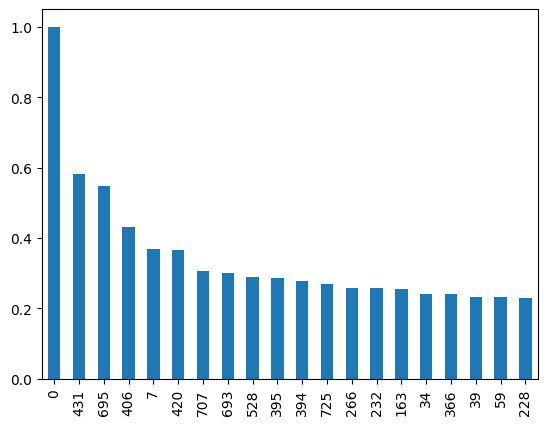

In [133]:
pd.DataFrame(arr).loc[0].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [134]:
short_athensvoice_df['full_text'].loc[0]

'Œ†œÖœÅŒ∫Œ±Œ≥ŒπŒ¨ œÉŒµ ŒµŒ≥Œ∫Œ±œÑŒ±ŒªŒµŒªŒµŒπŒºŒºŒ≠ŒΩŒø Œ∫œÑŒÆœÅŒπŒø œÉœÑŒø Œ∫Œ≠ŒΩœÑœÅŒø œÑŒ∑œÇ ŒëŒ∏ŒÆŒΩŒ±œÇ Œ§Œπ Œ±ŒΩŒ±œÜŒ≠œÅŒøœÖŒΩ ŒøŒπ œÄœÅœéœÑŒµœÇ œÄŒªŒ∑œÅŒøœÜŒøœÅŒØŒµœÇ Œ†œÖœÅŒ∫Œ±Œ≥ŒπŒ¨ ŒæŒ≠œÉœÄŒ±œÉŒµ œÑŒø œÄœÅœâŒØ œÑŒ∑œÇ Œ†Œ±œÅŒ±œÉŒ∫ŒµœÖŒÆœÇ œÉŒµ ŒµŒ≥Œ∫Œ±œÑŒ±ŒªŒµŒªŒµŒπŒºŒºŒ≠ŒΩŒø Œ∫œÑŒÆœÅŒπŒø œÉœÑŒø Œ∫Œ≠ŒΩœÑœÅŒø œÑŒ∑œÇ ŒëŒ∏ŒÆŒΩŒ±œÇ Œ†œÖœÅŒ∫Œ±Œ≥ŒπŒ¨ ŒæŒ≠œÉœÄŒ±œÉŒµ œÉŒµ Œ∫œÑŒÆœÅŒπŒø œÉœÑŒø Œ∫Œ≠ŒΩœÑœÅŒø œÑŒ∑œÇ ŒëŒ∏ŒÆŒΩŒ±œÇ. Œ£œçŒºœÜœâŒΩŒ± ŒºŒµ œÑŒπœÇ œÄœÅœéœÑŒµœÇ œÄŒªŒ∑œÅŒøœÜŒøœÅŒØŒµœÇ, Œ∑ œÄœÖœÅŒ∫Œ±Œ≥ŒπŒ¨ ŒæŒ≠œÉœÄŒ±œÉŒµ œÑŒ± ŒæŒ∑ŒºŒµœÅœéŒºŒ±œÑŒ± œÑŒ∑œÇ Œ†Œ±œÅŒ±œÉŒ∫ŒµœÖŒÆœÇ, 9 ŒúŒ±ŒêŒøœÖ 2025, œÉŒµ ŒµŒ≥Œ∫Œ±œÑŒ±ŒªŒµŒªŒµŒπŒºŒºŒ≠ŒΩŒø Œ∫œÑŒÆœÅŒπŒø œÉœÑŒ∑ œÉœÖŒºŒ≤ŒøŒªŒÆ œÑœâŒΩ ŒøŒ¥œéŒΩ ŒúŒµŒΩŒµŒºŒ¨œáŒøœÖ Œ∫Œ±Œπ ŒõŒπŒøœÉŒØœâŒΩ, œÉœÑŒø Œ∫Œ≠ŒΩœÑœÅŒø œÑŒ∑œÇ ŒëŒ∏ŒÆŒΩŒ±œÇ. Œ§Œ± Œ±ŒØœÑŒπŒ± œÑŒ∑œÇ œÜœâœÑŒπŒ¨œÇ œÄŒ±œÅŒ±ŒºŒ≠ŒΩŒøœÖŒΩ Œ¨Œ≥ŒΩœâœÉœÑŒ± ŒºŒ≠œáœÅŒπ œÉœÑŒπŒ≥ŒºŒÆœÇ. ŒÜŒºŒµœÉŒ∑ ŒÆœÑŒ±ŒΩ Œ∑ Œ∫ŒπŒΩŒ∑œÑŒøœÄŒøŒØŒ∑œÉŒ∑ œÑŒ∑œÇ Œ†œÖœÅŒøœÉŒ≤ŒµœÉœÑŒπŒ∫ŒÆœÇ Œ•œÄŒ∑œÅŒµœÉŒØŒ±œÇ, ŒºŒµ ŒµŒΩŒΩŒ≠Œ± œÄœÖœÅŒø

In [136]:
short_athensvoice_df['full_text'].loc[431]

'Œ†œÖœÅŒ∫Œ±Œ≥ŒπŒ¨ œÉŒµ Œ¥ŒπŒ±ŒºŒ≠œÅŒπœÉŒºŒ± œÉœÑŒø Œ∫Œ≠ŒΩœÑœÅŒø œÑŒ∑œÇ ŒëŒ∏ŒÆŒΩŒ±œÇ ŒëŒΩŒ±œÜŒøœÅŒ≠œÇ Œ≥ŒπŒ± ŒµŒ≥Œ∫ŒªœâŒ≤ŒπœÉŒºŒ≠ŒΩŒø Œ†œÖœÅŒ∫Œ±Œ≥ŒπŒ¨ œÉŒµ Œ¥ŒπŒ±ŒºŒ≠œÅŒπœÉŒºŒ± œÉœÑŒø Œ∫Œ≠ŒΩœÑœÅŒø œÑŒ∑œÇ ŒëŒ∏ŒÆŒΩŒ±œÇ - ŒëŒΩŒ±œÜŒøœÅŒ≠œÇ Œ≥ŒπŒ± ŒµŒ≥Œ∫ŒªœâŒ≤ŒπœÉŒºŒ≠ŒΩŒø Œ†œÖœÅŒ∫Œ±Œ≥ŒπŒ¨ ŒµŒ∫Œ¥Œ∑ŒªœéŒ∏Œ∑Œ∫Œµ œÑŒø œÄœÅœâŒØ œÑŒ∑œÇ Œ§ŒµœÑŒ¨œÅœÑŒ∑œÇ 27 ŒîŒµŒ∫ŒµŒºŒ≤œÅŒØŒøœÖ\xa0œÉŒµ Œ¥ŒπŒ±ŒºŒ≠œÅŒπœÉŒºŒ± œÄœÅœéœÑŒøœÖ ŒøœÅœåœÜŒøœÖ œÄŒøŒªœÖŒ∫Œ±œÑŒøŒπŒ∫ŒØŒ±œÇ œÉœÑŒ∑ œÉœÖŒºŒ≤ŒøŒªŒÆ œÑœâŒΩ ŒøŒ¥œéŒΩ ŒöŒµœÅŒ±ŒºŒµŒπŒ∫Œøœç Œ∫Œ±Œπ ŒöŒ±ŒªŒªŒ≠œÅŒ≥Œ∑ œÉœÑŒø Œ∫Œ≠ŒΩœÑœÅŒø œÑŒ∑œÇ ŒëŒ∏ŒÆŒΩŒ±œÇ. Œ£œçŒºœÜœâŒΩŒ± ŒºŒµ œÄŒªŒ∑œÅŒøœÜŒøœÅŒØŒµœÇ Œ±œÄœå œÑŒ∑ŒΩ Œ†œÖœÅŒøœÉŒ≤ŒµœÉœÑŒπŒ∫ŒÆ, Œ±œÄŒµŒ≥Œ∫ŒªœâŒ≤ŒØœÉœÑŒ∑Œ∫Œ±ŒΩ Œ¨ŒºŒµœÉŒ± Œ¥œçŒø Œ¨œÑŒøŒºŒ± œÄŒøœÖ Œ≤œÅŒØœÉŒ∫ŒøŒΩœÑŒ±ŒΩ ŒºŒ≠œÉŒ± œÉœÑŒø Œ¥ŒπŒ±ŒºŒ≠œÅŒπœÉŒºŒ±. Œ£œÑŒ∑ŒΩ œÄŒµœÅŒπŒøœáŒÆ ŒµœÄŒπœáŒµŒπœÅŒøœçŒΩ 12 œÄœÖœÅŒøœÉŒ≤Œ≠œÉœÑŒµœÇ ŒºŒµ 4 ŒøœáŒÆŒºŒ±œÑŒ±. #Œ†œÖœÅŒ∫Œ±Œ≥ŒπŒ¨ œÉŒµ Œ¥ŒπŒ±ŒºŒ≠œÅŒπœÉŒºŒ±, ŒµœÄŒØ œÑŒ∑œÇ ŒøŒ¥Œøœç ŒöŒµœÅŒ±ŒºŒµŒπŒ∫Œøœç, œÉœÑŒø Œ¥ŒÆŒºŒø œÑŒ∑œÇ ŒëŒ∏ŒÆŒΩŒ±œ

<Axes: >

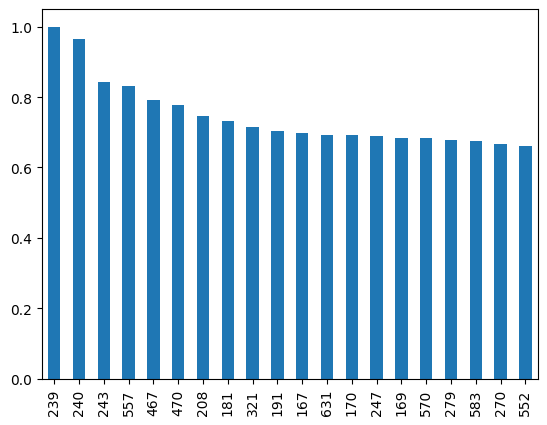

In [137]:
pd.DataFrame(arr).loc[239].sort_values(ascending = False).head(20).plot(kind = 'bar')

<Axes: >

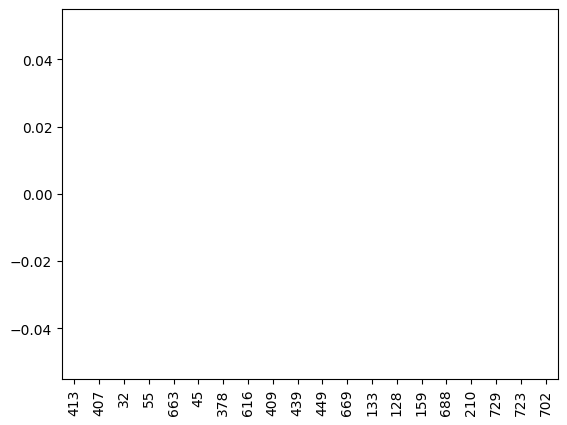

In [138]:
pd.DataFrame(arr).loc[239].sort_values(ascending = False).tail(20).plot(kind = 'bar')

In [139]:
short_athensvoice_df['full_text'].loc[239]

'Œ†ŒøŒªœç œÖœàŒ∑ŒªœåœÇ Œ∫ŒØŒΩŒ¥œÖŒΩŒøœÇ œÄœÖœÅŒ∫Œ±Œ≥ŒπŒ¨œÇ œÉŒÆŒºŒµœÅŒ± (15.7) œÉŒµ ŒµœÄœÑŒ¨ œÄŒµœÅŒπœÜŒ≠œÅŒµŒπŒµœÇ œÑŒ∑œÇ œáœéœÅŒ±œÇ Œü œáŒ¨œÅœÑŒ∑œÇ œÑŒ∑œÇ ŒìŒµŒΩŒπŒ∫ŒÆœÇ ŒìœÅŒ±ŒºŒºŒ±œÑŒµŒØŒ±œÇ Œ†ŒøŒªŒπœÑŒπŒ∫ŒÆœÇ Œ†œÅŒøœÉœÑŒ±œÉŒØŒ±œÇ ŒöŒØŒΩŒ¥œÖŒΩŒøœÇ œÄœÖœÅŒ∫Œ±Œ≥ŒπŒ¨œÇ: Œ†ŒøŒªœç œÖœàŒ∑ŒªœåœÇ œÉŒÆŒºŒµœÅŒ± (15.7) œÉŒµ ŒµœÄœÑŒ¨ œÄŒµœÅŒπœÜŒ≠œÅŒµŒπŒµœÇ -\xa0Œü œáŒ¨œÅœÑŒ∑œÇ œÑŒ∑œÇ ŒìŒµŒΩŒπŒ∫ŒÆœÇ ŒìœÅŒ±ŒºŒºŒ±œÑŒµŒØŒ±œÇ Œ†ŒøŒªŒπœÑŒπŒ∫ŒÆœÇ Œ†œÅŒøœÉœÑŒ±œÉŒØŒ±œÇ Œ†ŒøŒªœç œÖœàŒ∑ŒªœåœÇ Œ∫ŒØŒΩŒ¥œÖŒΩŒøœÇ œÄœÖœÅŒ∫Œ±Œ≥ŒπŒ¨œÇ (Œ∫Œ±œÑŒ∑Œ≥ŒøœÅŒØŒ± Œ∫ŒπŒΩŒ¥œçŒΩŒøœÖ 4)\xa0œÄœÅŒøŒ≤ŒªŒ≠œÄŒµœÑŒ±Œπ œÉŒÆŒºŒµœÅŒ±, ŒîŒµœÖœÑŒ≠œÅŒ± 15 ŒôŒøœÖŒªŒØŒøœÖ œÉœÑŒπœÇ œÄŒµœÅŒπœÜŒ≠œÅŒµŒπŒµœÇ ŒëœÑœÑŒπŒ∫ŒÆœÇ Œ∫Œ±Œπ ŒöœÅŒÆœÑŒ∑œÇ Œ∫Œ±Œ∏œéœÇ Œ∫Œ±Œπ œÉŒµ œÄŒµœÅŒπŒøœáŒ≠œÇ œÑŒ∑œÇ Œ†ŒµŒªŒøœÄŒøŒΩŒΩŒÆœÉŒøœÖ, œÑŒ∑œÇ Œ£œÑŒµœÅŒµŒ¨œÇ ŒïŒªŒªŒ¨Œ¥Œ±œÇ, œÑŒøœÖ ŒíŒøœÅŒµŒØŒøœÖ ŒëŒπŒ≥Œ±ŒØŒøœÖ, œÑŒ∑œÇ ŒëŒΩŒ±œÑŒøŒªŒπŒ∫ŒÆœÇ ŒúŒ±Œ∫ŒµŒ¥ŒøŒΩŒØŒ±œÇ Œ∫Œ±Œπ ŒòœÅŒ¨Œ∫Œ∑œÇ, œÉœçŒºœÜœâŒΩŒ± ŒºŒµ œÑŒø\xa0ŒßŒ¨œÅœÑŒ∑ Œ†œÅœåŒ≤ŒªŒµœàŒ∑œÇ ŒöŒπŒΩŒ¥œçŒΩŒøœÖ Œ†œÖœÅŒ∫Œ±Œ

In [140]:
short_athensvoice_df['full_text'].loc[240]

'Œ†ŒøŒªœç œÖœàŒ∑ŒªœåœÇ Œ∫ŒØŒΩŒ¥œÖŒΩŒøœÇ œÄœÖœÅŒ∫Œ±Œ≥ŒπŒ¨œÇ Œ±œçœÅŒπŒø œÉŒµ ŒµœÄœÑŒ¨ œÄŒµœÅŒπœÜŒ≠œÅŒµŒπŒµœÇ œÑŒ∑œÇ œáœéœÅŒ±œÇ Œ£œÖœÉœÑŒ¨œÉŒµŒπœÇ œÑŒ∑œÇ ŒìŒìŒ†Œ† ŒªœåŒ≥œâ œÑœâŒΩ œÄŒøŒªœç œÖœàŒ∑ŒªœéŒΩ Œ∏ŒµœÅŒºŒøŒ∫œÅŒ±œÉŒπœéŒΩ Œ†ŒøŒªŒπœÑŒπŒ∫ŒÆ Œ†œÅŒøœÉœÑŒ±œÉŒØŒ±: Œ†ŒøŒªœç œÖœàŒ∑ŒªœåœÇ Œ∫ŒØŒΩŒ¥œÖŒΩŒøœÇ œÄœÖœÅŒ∫Œ±Œ≥ŒπŒ¨œÇ Œ±œçœÅŒπŒø œÉŒµ ŒµœÄœÑŒ¨ œÄŒµœÅŒπœÜŒ≠œÅŒµŒπŒµœÇ Œ†ŒøŒªœç œÖœàŒ∑ŒªœåœÇ Œ∫ŒØŒΩŒ¥œÖŒΩŒøœÇ œÄœÖœÅŒ∫Œ±Œ≥ŒπŒ¨œÇ (Œ∫Œ±œÑŒ∑Œ≥ŒøœÅŒØŒ± Œ∫ŒπŒΩŒ¥œçŒΩŒøœÖ 4)\xa0œÄœÅŒøŒ≤ŒªŒ≠œÄŒµœÑŒ±Œπ Œ±œçœÅŒπŒø, œÉœÑŒπœÇ œÄŒµœÅŒπœÜŒ≠œÅŒµŒπŒµœÇ ŒëœÑœÑŒπŒ∫ŒÆœÇ Œ∫Œ±Œπ ŒöœÅŒÆœÑŒ∑œÇ Œ∫Œ±Œ∏œéœÇ Œ∫Œ±Œπ œÉŒµ œÄŒµœÅŒπŒøœáŒ≠œÇ œÑŒ∑œÇ Œ†ŒµŒªŒøœÄŒøŒΩŒΩŒÆœÉŒøœÖ, œÑŒ∑œÇ Œ£œÑŒµœÅŒµŒ¨œÇ ŒïŒªŒªŒ¨Œ¥Œ±œÇ, œÑŒøœÖ ŒíŒøœÅŒµŒØŒøœÖ ŒëŒπŒ≥Œ±ŒØŒøœÖ, œÑŒ∑œÇ ŒëŒΩŒ±œÑŒøŒªŒπŒ∫ŒÆœÇ ŒúŒ±Œ∫ŒµŒ¥ŒøŒΩŒØŒ±œÇ Œ∫Œ±Œπ ŒòœÅŒ¨Œ∫Œ∑œÇ, œÉœçŒºœÜœâŒΩŒ± ŒºŒµ œÑŒø\xa0ŒßŒ¨œÅœÑŒ∑ Œ†œÅœåŒ≤ŒªŒµœàŒ∑œÇ ŒöŒπŒΩŒ¥œçŒΩŒøœÖ Œ†œÖœÅŒ∫Œ±Œ≥ŒπŒ¨œÇ\xa0œÄŒøœÖ ŒµŒ∫Œ¥ŒØŒ¥ŒµŒπ Œ∑\xa0ŒìŒµŒΩŒπŒ∫ŒÆ ŒìœÅŒ±ŒºŒºŒ±œÑŒµŒØŒ± Œ†ŒøŒªŒπœÑŒπŒ∫ŒÆœÇ Œ†œÅŒøœÉœÑŒ±œÉŒØŒ±œÇ\xa0œÑŒøœÖ\xa0

In [141]:
arr = cosine_similarity(tfidf_matrix_train[0:10], tfidf_matrix_train[0:10])

<Axes: title={'center': 'ŒíŒ±Œ∏ŒºœåœÇ ŒøŒºŒøŒπœåœÑŒ∑œÑŒ±œÇ œÑœâŒΩ 10 œÄœÅœéœÑœâŒΩ Œ¨œÅŒ∏œÅœâŒΩ'}>

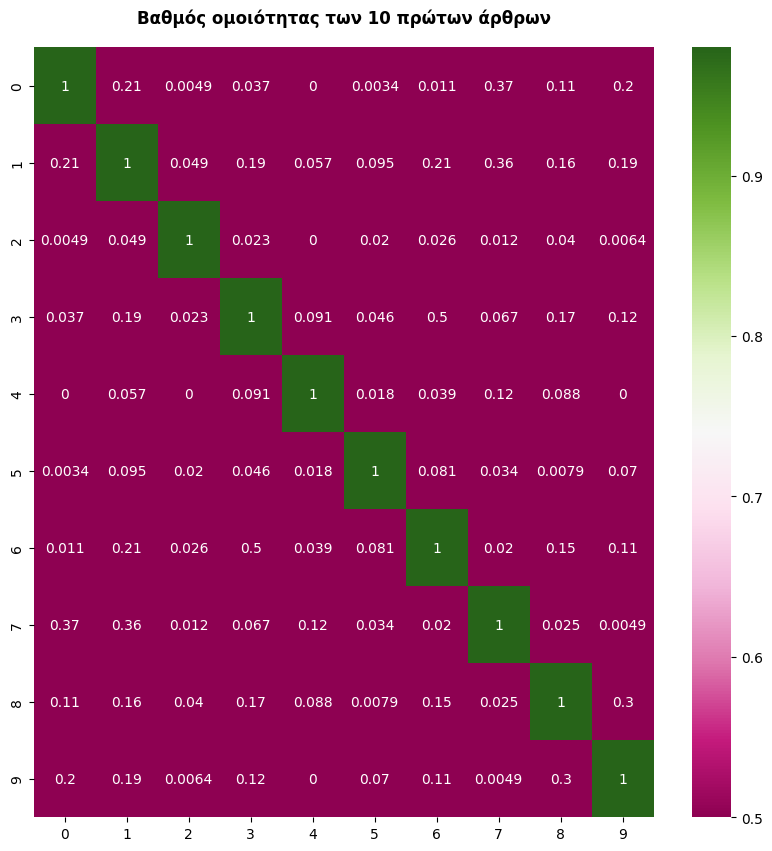

In [143]:
plt.figure(figsize=(10, 10))
# annot = True to print the values inside the square
plt.title('ŒíŒ±Œ∏ŒºœåœÇ ŒøŒºŒøŒπœåœÑŒ∑œÑŒ±œÇ œÑœâŒΩ 10 œÄœÅœéœÑœâŒΩ Œ¨œÅŒ∏œÅœâŒΩ', y=1.02, fontweight='bold')

sns.heatmap(data=arr, annot=True, vmin=0.50, vmax=0.98, cmap="PiYG")

#plt.savefig('<œÑŒø path Œ∫Œ±Œπ œÑŒø œåŒΩŒøŒºŒ± œÑŒøœÖ Œ±œÅœáŒµŒØŒøœÖ>.png')

<Axes: title={'center': 'ŒíŒ±Œ∏ŒºœåœÇ ŒøŒºŒøŒπœåœÑŒ∑œÑŒ±œÇ œÑœâŒΩ 10 œÄœÅœéœÑœâŒΩ Œ¨œÅŒ∏œÅœâŒΩ'}>

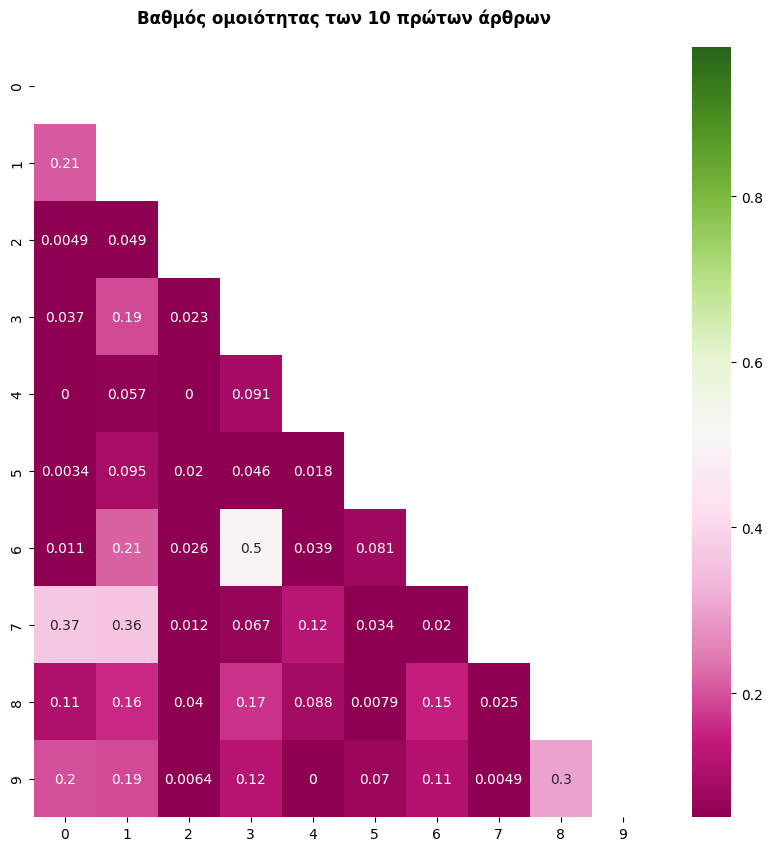

In [144]:
plt.figure(figsize=(10, 10))
# annot = True to print the values inside the square
plt.title('ŒíŒ±Œ∏ŒºœåœÇ ŒøŒºŒøŒπœåœÑŒ∑œÑŒ±œÇ œÑœâŒΩ 10 œÄœÅœéœÑœâŒΩ Œ¨œÅŒ∏œÅœâŒΩ', y=1.02, fontweight='bold') # œÑŒø y ŒøœÅŒØŒ∂ŒµŒπ œÑŒ∑ŒΩ Œ±œÄœåœÉœÑŒ±œÉŒ∑ œÑŒøœÖ œÑŒØœÑŒªŒøœÖ Œ±œÄœå œÑŒø Œ≥œÅŒ¨œÜŒ∑ŒºŒ±

# mask
mask = np.triu(np.ones_like(arr, dtype=bool))
sns.heatmap(data=arr, annot=True, vmin=0.05, vmax=0.98, cmap="PiYG", mask=mask)

#plt.savefig('<œÑŒø path Œ∫Œ±Œπ œÑŒø œåŒΩŒøŒºŒ± œÑŒøœÖ Œ±œÅœáŒµŒØŒøœÖ>.png')

ŒåœÄœâœÇ ŒªŒ≠œÑŒµ Œ∫Œ±Œπ œÉœÑŒ∑ŒΩ ŒµŒ∫œÜœéŒΩŒ∑œÉŒ∑ œÑŒ∑œÇ Œ¨œÉŒ∫Œ∑œÉŒ∑œÇ Œ∫Œ±œÑŒ±Œ≥œÅŒ¨œÜœâ œÑŒπœÇ Œ¥œÖœÉŒ∫ŒøŒªŒØŒµœÇ ŒºŒøœÖ (œÉœÖŒΩŒøŒªŒπŒ∫Œ¨ Œ±œÄœå œÑŒø scraping, Œ≤Œ¨œÉŒµŒπ œåœÉœâŒΩ œÄŒ±œÅŒ±œÑŒ∑œÅœé Œ±œÄœå ŒµŒ¥œé):

1. Œàœáœâ œÉŒ∫œÅŒ¨œÄŒ±œÅŒµŒπ Œ¨œÉœáŒµœÑŒ± Œ¨œÅŒ∏œÅŒ± (Œ¥Œµ ŒæŒ≠œÅœâ Œ≥ŒπŒ±œÑŒØ œÖœÄŒÆœÅœáŒ±ŒΩ œÉœÑŒ∑ œÉŒµŒªŒØŒ¥Œ± Œ±ŒΩŒ±Œ∂ŒÆœÑŒ∑œÉŒ∑œÇ ŒºŒµ œÑŒ∑ ŒªŒ≠ŒæŒ∑ œÄœÖœÅŒ∫Œ±Œ≥ŒπŒ¨ œÄŒøœÖ Œ±ŒΩŒ±Œ∂ŒÆœÑŒ∑œÉŒ± Œ∫Œ±Œπ Œ¥Œµ ŒæŒ≠œÅœâ œÄœâœÇ ŒΩŒ± œÑŒ± Œ∫Œ±Œ∏Œ±œÅŒØœÉœâ ŒºŒ±Œ∂ŒπŒ∫Œ¨ Œ≥ŒπŒ± ŒΩŒ± œÑŒ± Œ±œÄŒøŒ∏Œ∑Œ∫ŒµœçœÉœâ œÉŒµ Œ≠ŒΩŒ± ŒΩŒ≠Œø df, Œ≥ŒπŒ±œÑŒØ Œ¥Œµ ŒæŒ≠œÅœâ œÉŒµ œÑŒπ Œ±œÜŒøœÅŒøœçŒΩ œåŒªŒ± Œ±œÖœÑŒ¨ ŒΩŒ± œÑŒ± œÄœÅŒøœÉŒ∏Œ≠œÉœâ œÉœÑŒ± stopwords Œ≠œÉœÑœâ)
2. ŒëŒΩŒ¨ŒºŒµœÉŒ± œÉœÑŒπœÇ œÉœÖœáŒΩœåœÑŒµœÅŒµœÇ ŒªŒ≠ŒæŒµŒπœÇ ŒµŒØŒΩŒ±Œπ Œø œåœÅŒøœÇ Œ±ŒΩŒ±Œ∂ŒÆœÑŒ∑œÉŒ∑œÇ (ŒµŒΩ œÄœÅŒøŒ∫ŒµŒπŒºŒ≠ŒΩœâ œÄœÖœÅŒ∫Œ±Œ≥ŒπŒ¨/ŒµœÇ/œâœÇ, Œ∫ŒªœÄ.), œÄœÅŒ≠œÄŒµŒπ œÄŒ¨ŒΩœÑŒ± ŒΩŒ± œÑŒøŒΩ œÄœÅŒøœÉŒ∏Œ≠œÑœâ œÉœÑŒ± stopwords?
3. Œ∏Œ± Œ∑Œ∏ŒµŒªŒ± Œ±ŒΩ ŒºœÄŒøœÅŒµŒπœÑŒµ ŒΩŒ± ŒºŒ±œÇ Œ¥œâœÉŒµœÑŒµ œÑŒøŒΩ Œ∫œâŒ¥ŒπŒ∫Œ± œÄŒøœÖ œáœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒ∑œÉŒ±œÑŒµ œÉœÑŒø œÄœÅŒøŒ∑Œ≥ŒøœÖŒºŒµŒΩŒø ŒºŒ±Œ∏Œ∑ŒºŒ± œÄŒøœÖ ŒøœÑŒ±ŒΩ œáœâœÅŒπŒ∂ŒµŒπ œÑŒ± Œ∫ŒµŒπŒºŒµŒΩŒ± Œ≥ŒπŒ± ŒΩŒ± Œ±œÜŒ±ŒπœÅŒµŒ∏ŒøœçŒΩ œÑŒ± \n\t, Œ∫ŒªœÄ., Œ∫Œ±Œ∏œéœÇ ŒµŒΩœÑŒøœÄŒØŒ∂œâ Œ±Œ∫œÅŒµœÑŒ¨ œÑŒ≠œÑŒøŒπŒ± œÉœÑŒ± texts ŒºŒøœÖ (œÄœá. \xa0) Œ∫Œ±Œπ Œ∏ŒµŒªœâ ŒΩŒ± œÑŒ± Œ±œÜŒ±ŒπœÅŒ≠œÉœâ œÉœÖŒΩŒøŒªŒπŒ∫Œ¨ œÉœÑŒ± csv Œ±ŒªŒªŒ¨ Œ¥Œµ œÑŒ± Œ∫Œ±œÑŒ±œÜŒ≠œÅŒΩœâ Œ∫Œ±Œπ Œ¥Œµ ŒæŒ≠œÅœâ Œ≥ŒπŒ±œÑŒØ, œÑŒØ Œ∫Œ¨ŒΩœâ ŒªŒ¨Œ∏ŒøœÇ)
4. ŒëœÄŒøœÅŒØŒ±: œÄœâœÇ Œ≥ŒØŒΩŒµœÑŒ±Œπ ŒΩŒ± ŒµŒºœÜŒ±ŒΩŒØŒ∂ŒµŒπ Œ±œÅŒ±Œ≤ŒπŒ∫ŒøœçœÇ œáŒ±œÅœÅŒ±Œ∫œÑŒÆœÅŒµœÇ; (Œ±œÖœÑŒøœçœÇ ŒµŒΩŒΩŒøœé - Œ±ŒΩ ŒµŒπŒΩŒ±Œπ Œ±œÅŒ±Œ≤ŒπŒ∫ŒøŒØ:\ : ÿ£ŸÖŸÜ	ÿßŸÑÿ•ÿ≥ŸÖÿßÿπŸäŸÑŸäÿ©	ÿ™ÿÆŸÅŸä	ŸÑŸÑŸÜŸäÿ±ÿßŸÜ	ŸÖÿ®ŸÜŸâ	ŸÖÿØŸäÿ±Ÿäÿ©	ŸÖÿ±ÿπÿ®ÿ©	ŸÖÿ¥ÿßŸáÿØ	ŸÖŸÑÿßŸÖÿ≠)
5. ŒÜœÉœáŒµœÑŒø Œ±ŒªŒªŒ¨: œåœÑŒ±ŒΩ Œ¥ŒøŒ∫ŒØŒºŒ±œÉŒ± ŒΩŒ± œÉŒ∫œÅŒ±œÄŒ¨œÅœâ Œ¨œÅŒ∏œÅŒ± ŒºŒµ œÑŒøŒΩ scraper œÑŒ∑œÇ Œ∫Œ±Œ∏Œ∑ŒºŒµœÅŒπŒΩŒÆœÇ, ŒµŒΩœé ŒøŒπ œÉŒµŒªŒØŒ¥ŒµœÇ Œ≥ŒπŒ± œÑŒø œáœÅŒøŒΩŒπŒ∫œå œÄŒªŒ±ŒØœÉŒπŒø œÄŒøœÖ Œ∏Œ± ŒµŒæŒµœÑŒ¨œÉœâ ŒÆœÑŒ±ŒΩ Œ±œÄœå œÑŒ∑ŒΩ 1 Œ≠œâœÇ œÑŒ∑ŒΩ 195, ŒºŒµœÑŒ¨ œÑŒ∑ŒΩ 177 ŒµŒºœÜŒ¨ŒΩŒπŒ∂Œµ error (soup = None Œ∫Œ±Œπ Œ¥ŒµŒΩ ŒµŒ∫Œ±ŒΩŒµ scrape) Œ∫Œ±Œπ Œ≠œÑœÉŒπ Œ≠œÜœÑŒπŒ±ŒæŒ± Œ≠ŒΩŒ±ŒΩ Œ¨ŒªŒªŒø scraper ŒºŒµ œÑŒ∑ Œ≤ŒøŒÆŒ∏ŒµŒπŒ± œÑŒøœÖ ai Œ≤ŒøŒ∑Œ∏Œøœç œÑŒ∑œÇ colab œÜœÖœÉŒπŒ∫Œ¨ Œ∫Œ±Œπ œÄŒÆœÅŒ± Œ≠œÑœÉŒπ œÑŒ± Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩŒ± Œ±œÄœå œÑŒ∑ŒΩ 177 ŒµœâœÇ œÑŒ∑ŒΩ 193. ŒïœÅœéœÑŒ∑œÉŒ∑ œÉœáŒµœÑŒπŒ∫ŒÆ: ŒµŒ≥œé Œ≥ŒπŒ± œÑŒ∑ŒΩ œÑŒµŒªŒπŒ∫ŒÆ œÖœÄŒøŒ≤ŒøŒªŒÆ œÄœÅŒ≠œÄŒµŒπ ŒΩŒ± Œ≠œáœâ Œ∫Œ±Œπ œÑŒøœÖœÇ 2 scraper Œ≥ŒπŒ± œÑŒ∑ŒΩ Œ∫Œ±Œ∏Œ∑ŒºŒµœÅŒπŒΩŒÆ œÉŒµ Œ≠ŒΩŒ± notebook?
6. ŒïœÅœéœÑŒ∑œÉŒ∑ Œ≥ŒπŒ± œÑŒ∑ŒΩ œÑŒµŒªŒπŒ∫ŒÆ œÖœÄŒøŒ≤ŒøŒªŒÆ: ŒàŒΩŒ±œÇ œÜŒ¨Œ∫ŒµŒªŒøœÇ ŒºŒµ œåŒªŒøœÖœÇ œÑŒøœÖœÇ scraper (Œ¥ŒπŒ±œÜŒøœÅŒµœÑŒπŒ∫ŒøœçœÇ Œ≥ŒπŒ± Œ∫Œ¨Œ∏Œµ œÉŒµŒªŒØŒ¥Œ± œÄŒøœÖ œáœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒÆœÉŒ±) ŒµŒØŒΩŒ±Œπ ŒøŒ∫;
7. ŒïŒØŒΩŒ±Œπ œÖœÄŒøœáœÅŒµœâœÑŒπŒ∫œå ŒΩŒ± œáœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒÆœÉŒøœÖŒºŒµ œåŒªŒµœÇ œÑŒπœÇ œÑŒµœáŒΩŒπŒ∫Œ≠œÇ œÉŒµ œåŒªŒµœÇ œÑŒπœÇ œÉŒµŒªŒØŒ¥ŒµœÇ œÄœá ŒΩŒ± Œ∫Œ¨ŒΩŒøœÖŒºŒµ wordclouds Œ≥ŒπŒ± œåŒªŒµœÇ œÑŒπœÇ œÉŒµŒªŒØŒ¥ŒµœÇ œÄŒøœÖ œÉŒ∫œÅŒ±œÄŒ¨œÅŒøœÖŒºŒµ ŒÆ ŒºœÄŒøœÅŒøœçŒºŒµ ŒΩŒ± Œ∫œÅŒ±œÑŒÆœÉŒøœÖŒºŒµ œâœÇ Œ∫ŒµŒΩœÑœÅŒπŒ∫ŒÆ œÑŒ∑ Œ¥ŒπŒ∫ŒÆ ŒºŒ±œÇ Œ∫Œ±Œπ ŒΩŒ± œÑŒ∑ œÉœÖŒ≥Œ∫œÅŒØŒΩŒøœÖŒºŒµ ŒºŒµ œÑŒπœÇ Œ¨ŒªŒªŒµœÇ ŒºŒµ Œ¥ŒπŒ±œÜŒøœÅŒµœÑŒπŒ∫ŒøœçœÇ œÑœÅœåœÄŒøœÖœÇ œÄœá wordclouds --> athens voice(Œ¥ŒπŒ∫ŒÆ ŒºŒøœÖ) & kathimerini, vectorization --> athensvoice & newsbomb